# Step-1 Reading and understanding the data

In [518]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#display the max row and column
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [519]:
#reading the dataset
df= pd.read_csv("train.csv")

In [520]:
#reading the first few rows of the dataset
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [521]:
#shape of the dataset
df.shape

(1460, 81)

In [522]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- we observed that we have 1460 rows and 81 columns 
- we have 37 numerical  columns 
- we have 43 categorical columns 

In [523]:
#statistical view of the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step-2 Data Cleaning 

In [524]:
#checking the null value 
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [525]:
#checking the percentage of the null values in the dataset
round(100*(df.isnull().sum()/len(df)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [526]:
#we see that the few variables/columns shows high percentage ie more than 80% of null values so we will drop those variables
df.drop(["Alley","PoolQC","MiscFeature","Fence"],axis=1,inplace=True)

- even if we replace the null with the other categories values  and check the skewness it will be high hence we need to drop these variables

In [527]:
#checking the percenatge of null values after dropping few variables
round(100*(df.isnull().sum()/len(df)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [528]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

#### missing value treatment 

In [529]:
#imputing the numerical variable 
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(),inplace=True)

In [530]:
#imputing with mode
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0],inplace=True)
df.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

- we will use mode to impute the variable 

In [531]:
#imputing the categorical value
# df["BsmtQual"]=df["BsmtQual"].replace(np.NaN,"nobasementqual")
df["BsmtQual"].fillna(df["BsmtQual"].mode()[0],inplace=True)
df.BsmtQual.value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [532]:
#imputing the categorical value
df["BsmtCond"]=df["BsmtCond"].replace(np.NaN,"nobasementcond")
df['BsmtCond'] = df['BsmtCond'].replace(['nobasementcond','Po'], 'Othersbasement')
df.BsmtCond.value_counts()

TA                1311
Gd                  65
Fa                  45
Othersbasement      39
Name: BsmtCond, dtype: int64

- this variable is highly skewed but we will keep it for the rfe to select the features

In [533]:
#imputing the categorical value
# df["BsmtExposure"]=df["BsmtExposure"].replace(np.NaN,"Nobasementexpo")
df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0],inplace=True)
df.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [534]:
#imputing the categorical value
df["FireplaceQu"]=df["FireplaceQu"].replace(np.NaN,"NofireplaceQu")
#df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0],inplace=True)
df.FireplaceQu.value_counts()

NofireplaceQu    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

- Since this feature is important so we are categorising the nan values from the above variable into a different category 

In [535]:
#imputing this categorical variable
#df["BsmtFinType1"]=df["BsmtFinType1"].replace(np.NaN,"Nobasementtype1")
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0],inplace=True)
df.BsmtFinType1.value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [536]:
#imputing the categorical value
df["BsmtFinType2"]=df["BsmtFinType2"].replace(np.NaN,"Nobasementtype2")
df.BsmtFinType2.value_counts()

Unf                1256
Rec                  54
LwQ                  46
Nobasementtype2      38
BLQ                  33
ALQ                  19
GLQ                  14
Name: BsmtFinType2, dtype: int64

- we observe highly skewed data so we will drop this variable

In [537]:
#this variable is highly skewed so we will drop this variable
df.drop("BsmtFinType2",axis=1,inplace=True)

In [538]:
#imputing the categorical value
df["GarageType"].fillna(df["GarageType"].mode()[0],inplace=True)
df['GarageType'] = df['GarageType'].replace(['CarPort','2Types'], 'OthersGarageType')
df.GarageType.value_counts()

Attchd              951
Detchd              387
BuiltIn              88
Basment              19
OthersGarageType     15
Name: GarageType, dtype: int64

In [539]:
#imputing the categorical value
df["GarageYrBlt"]=df["GarageYrBlt"].replace(np.NaN,"NoGarageYrBlt")
df.GarageYrBlt.value_counts()

NoGarageYrBlt    81
2005.0           65
2006.0           59
2004.0           53
2003.0           50
2007.0           49
1977.0           35
1998.0           31
1999.0           30
2008.0           29
1976.0           29
2000.0           27
2002.0           26
1968.0           26
1950.0           24
1993.0           22
1962.0           21
2009.0           21
1965.0           21
1966.0           21
1958.0           21
1970.0           20
1996.0           20
2001.0           20
1957.0           20
1978.0           19
1960.0           19
1954.0           19
1997.0           19
1964.0           18
1974.0           18
1995.0           18
1994.0           18
1959.0           17
1990.0           16
1963.0           16
1956.0           16
1969.0           15
1967.0           15
1979.0           15
1980.0           15
1988.0           14
1972.0           14
1940.0           14
1920.0           14
1973.0           14
1955.0           13
1961.0           13
1971.0           13
1992.0           13


- the above variable is not needed for the business point of view we can get the inference with the help of yearbuilt variable so we will drop this above variable and other year variables apart from yearbuilt  

In [540]:
#drop the variable
df.drop(["GarageYrBlt","YrSold","YearRemodAdd"],axis=1,inplace=True)

In [541]:
#imputing the categorical value, we are making the other category 
df["GarageFinish"]=df["GarageFinish"].replace(np.NaN,"NoGarageFinish")
df.GarageFinish.value_counts()

Unf               605
RFn               422
Fin               352
NoGarageFinish     81
Name: GarageFinish, dtype: int64

In [542]:
#imputing the categorical value
df["GarageQual"]=df["GarageQual"].replace(np.NaN,"NoGarageQual")
df['GarageQual'] = df['GarageQual'].replace(['Gd','Po','Ex'], 'OthersGarageQual')
df.GarageQual.value_counts()

TA                  1311
NoGarageQual          81
Fa                    48
OthersGarageQual      20
Name: GarageQual, dtype: int64

- we observe that the variable is highly skewed sbut it looks import ant so we will not drop the variable.

In [543]:
#imputing the categorical value
df["GarageCond"]=df["GarageCond"].replace(np.NaN,"NoGarageCond")
df['GarageCond'] = df['GarageCond'].replace(['Gd','Po','Ex'], 'OthersGarageCond')
df.GarageCond.value_counts()

TA                  1326
NoGarageCond          81
Fa                    35
OthersGarageCond      18
Name: GarageCond, dtype: int64

- we observe that the variable is highly skewed but we will keep this feature 

In [544]:
#imputing the categorical value
df["Electrical"]=df["Electrical"].replace(np.NaN,"NoElectrical")
#df['Electrical'] = df['Electrical'].replace(['FuseP','Mix','NoElectrical'], 'OthersElectrical')
df.Electrical.value_counts()

SBrkr           1334
FuseA             94
FuseF             27
FuseP              3
Mix                1
NoElectrical       1
Name: Electrical, dtype: int64

- we observe highly skewed data so we will drop this variable

In [545]:
#this variable is highly skewed so we will drop this variable
df.drop("Electrical",axis=1,inplace=True)

In [546]:
#checking if we still have any null values remaining even after imputing 
df.isnull().sum().any()

False

- from the observation it looks like there is no null values anymore in the dataset

In [547]:
#let check the shape of the dataset
df.shape

(1460, 72)

## Step-3 EDA

### Univariate analysis 

In [548]:
#checking the numerical columns 
df.select_dtypes(include=['int64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice'],
      dtype='object')

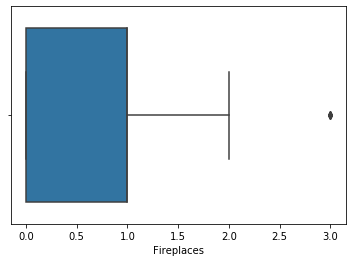

In [549]:
#analysing the variable fireplace 
sns.boxplot(x="Fireplaces",data=df)
plt.show()

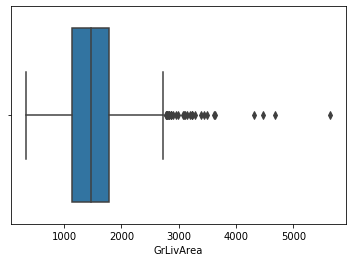

In [550]:
#analysing the variable fireplace 
sns.boxplot(x="GrLivArea",data=df)
plt.show()

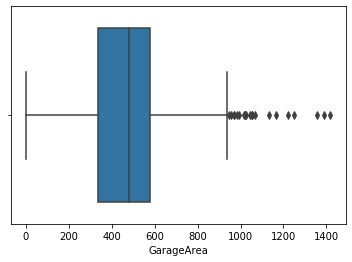

In [551]:
#plotting the garage area 
sns.boxplot(x="GarageArea",data=df)
plt.show()

- we observe that few garage area are wide enough have good space 

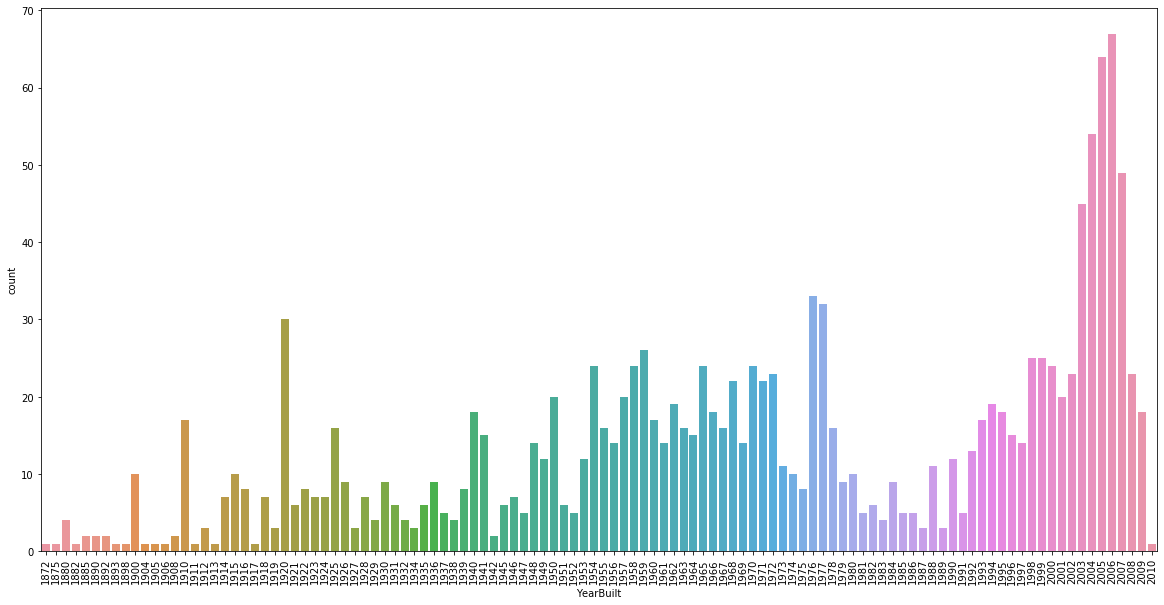

In [552]:
#checking the yearbuilt variable
plt.figure(figsize=(20,10))
sns.countplot(x="YearBuilt",data=df)
plt.xticks(rotation=90)
plt.show()

- In the year 2003 to 2007 there were a rise of houses built 

### Categorical variables

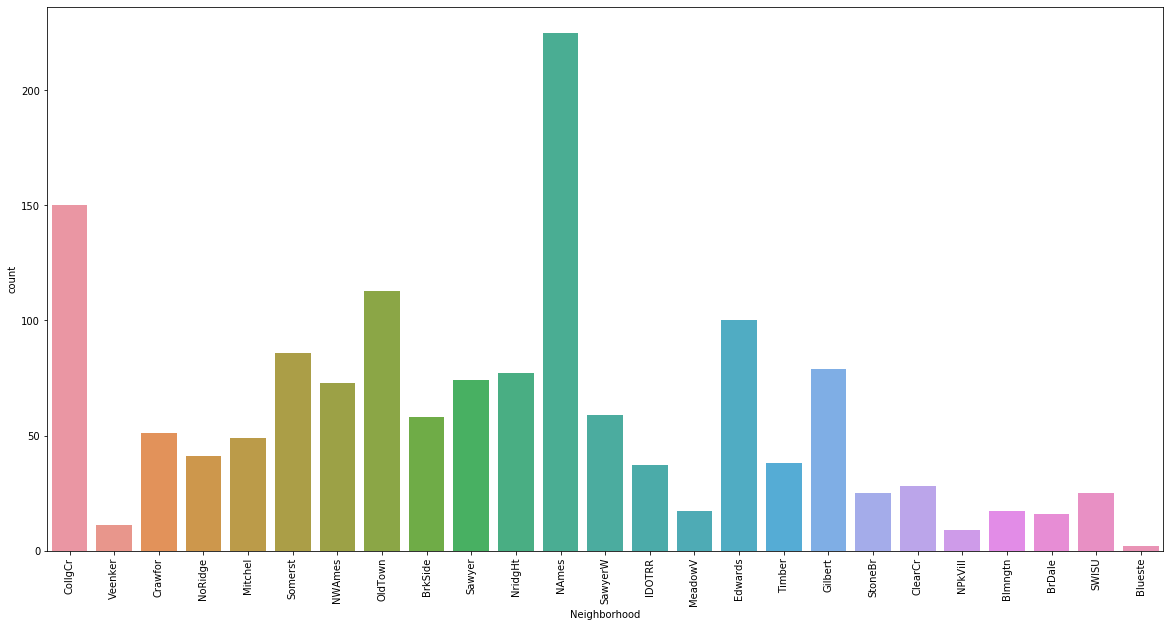

In [553]:
#analysisng the categorical variable
plt.figure(figsize=(20,10))
sns.countplot(x="Neighborhood",data=df)
plt.xticks(rotation=90)
plt.show()

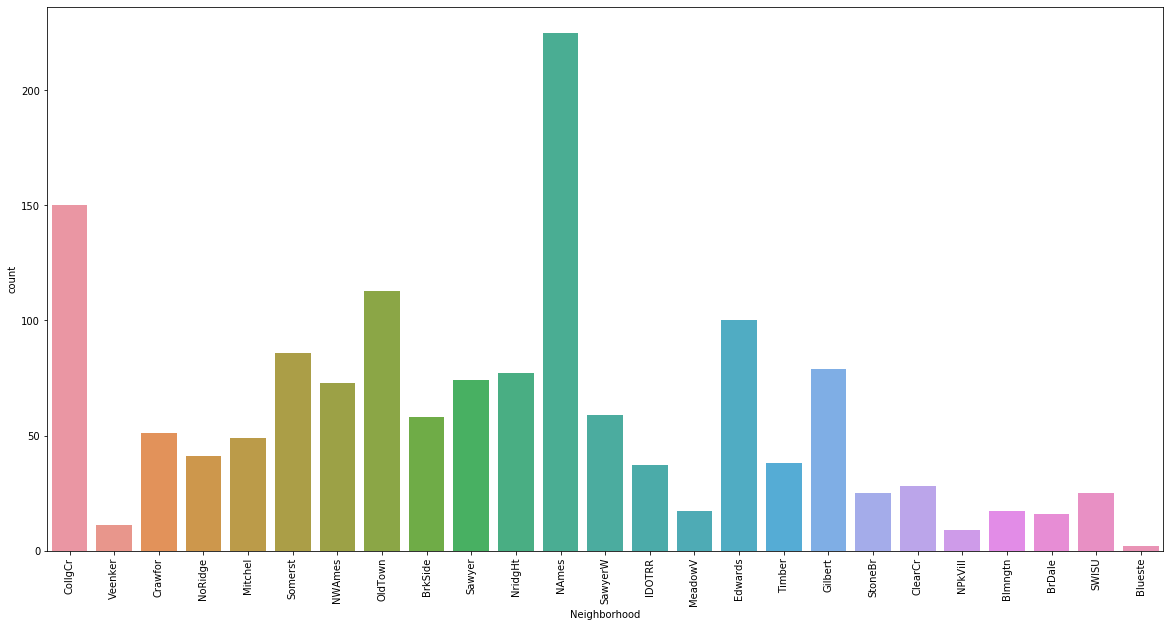

In [554]:
#plotting the variable neighborhood to check the distribution of the datset along the categories
plt.figure(figsize=(20,10))
sns.countplot(x="Neighborhood",data=df)
plt.xticks(rotation=90)
plt.show()

- we see that the saleprice the target variable is having the outliers so we are going to treat them by transforming them into the log 

### Bivariate analysis

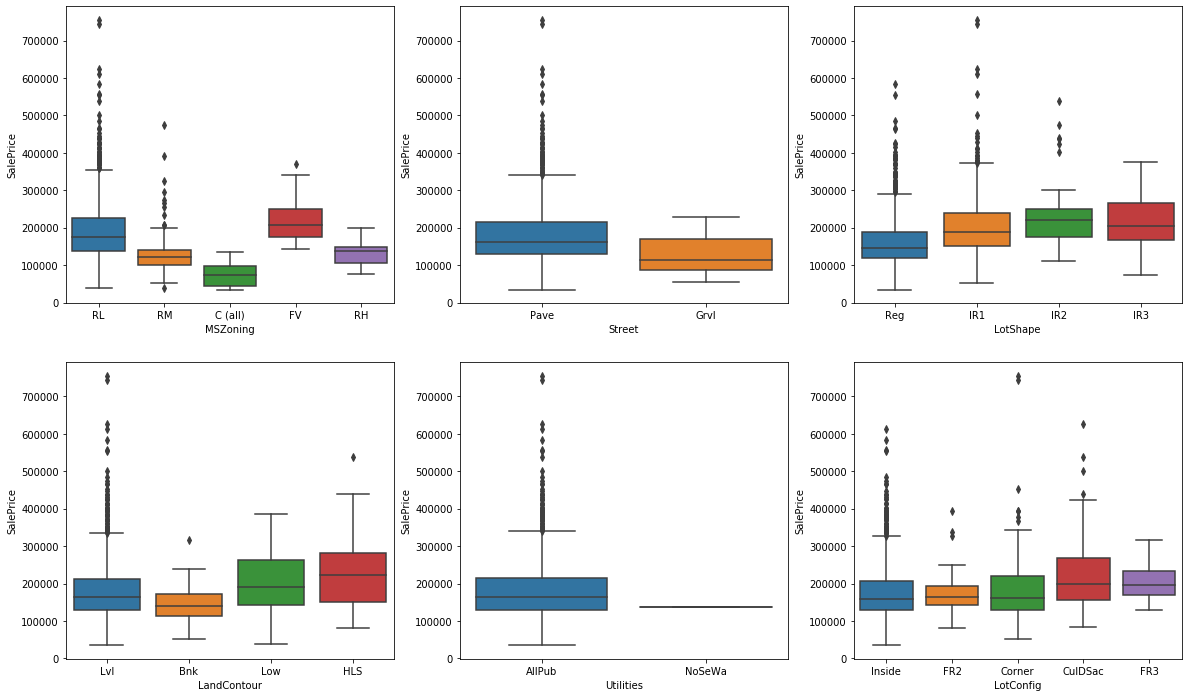

In [555]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df)
plt.show()

- the utilities variable looks highly skewed but we will leave it to the rfe to decide the features
- the sales price for the lot confirguration for the corner house is higher as compared with other lot configuration
- The general zoning classification category RL(Residential Low Density) is having higher sales price as compared to other zoning classification 

In [556]:
df_obj=df.select_dtypes(include=['object'])
df_obj.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

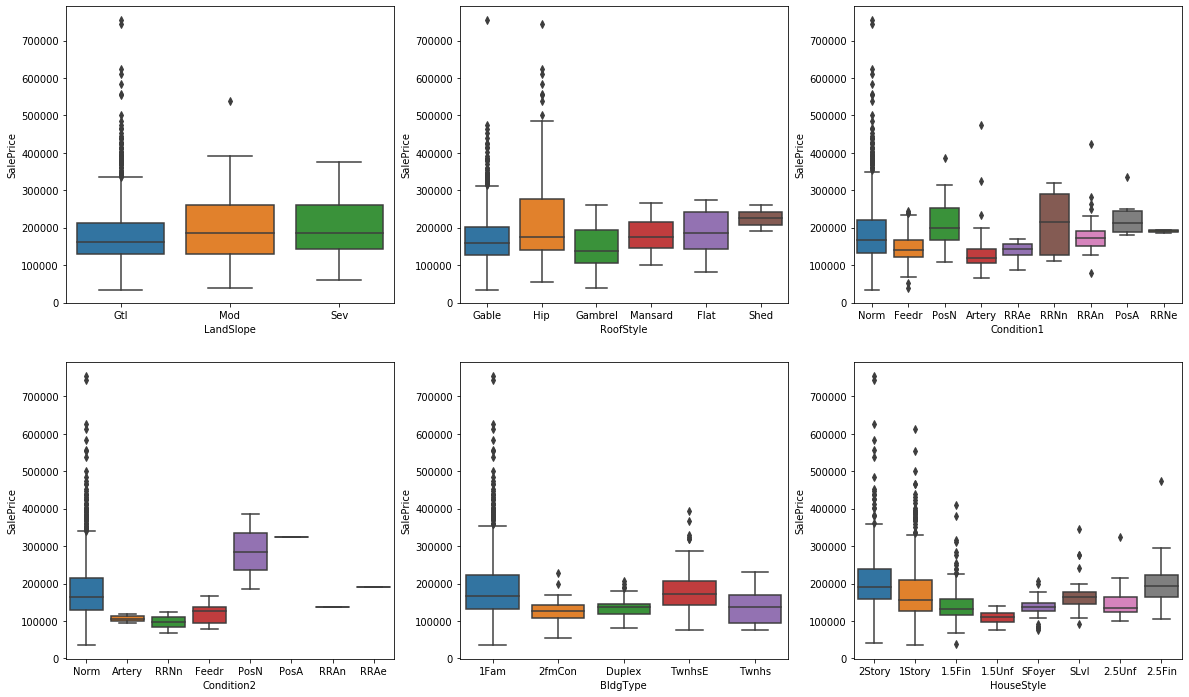

In [557]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df)
plt.show()

- The higher the storey the higher the sales price of the house ie people prefer the house at higher storey
- The salesprice of the building type where 1fam requiremnt is more has higher sales price for that house

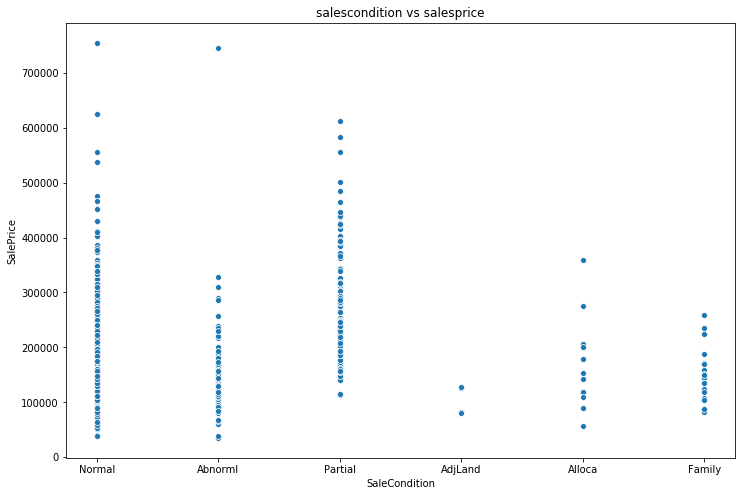

In [558]:
#plotting the sales condition vs salesprice of the house 
plt.figure(figsize=(12,8))
sns.scatterplot(df['SaleCondition'],df['SalePrice'])
plt.title("salescondition vs salesprice")
plt.show()

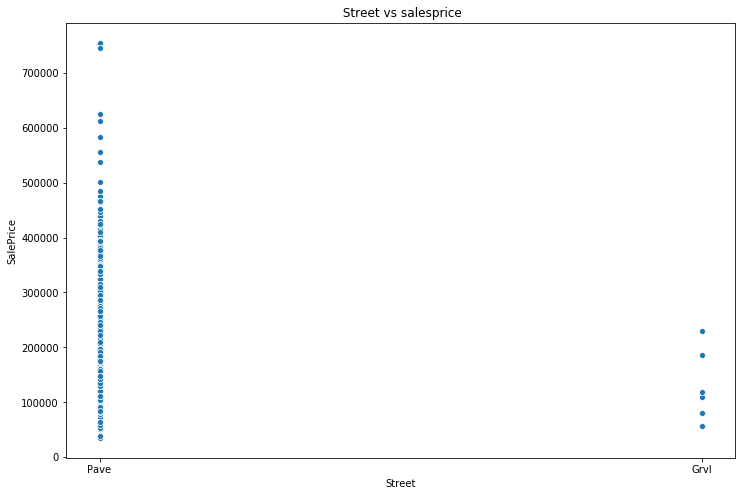

In [559]:
#plotting the sales for the street and checking the sales of the house
plt.figure(figsize=(12,8))
sns.scatterplot(df['Street'],df['SalePrice'])
plt.title(" Street vs salesprice")
plt.show()

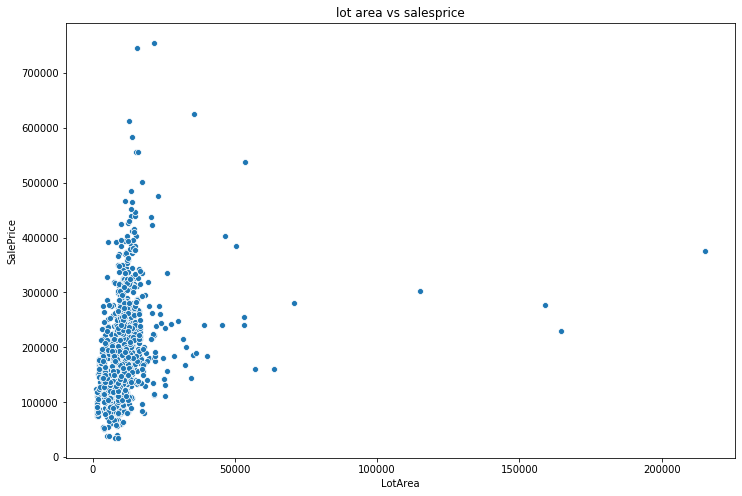

In [560]:
#plotting the lot size versus the salesprice 
plt.figure(figsize=(12,8))
sns.scatterplot(df['LotArea'],df['SalePrice'])
plt.title("lot area vs salesprice")
plt.show()

- we observe the lot area mostly with lesser than 50000 sqt ft has the high sale price of the house 

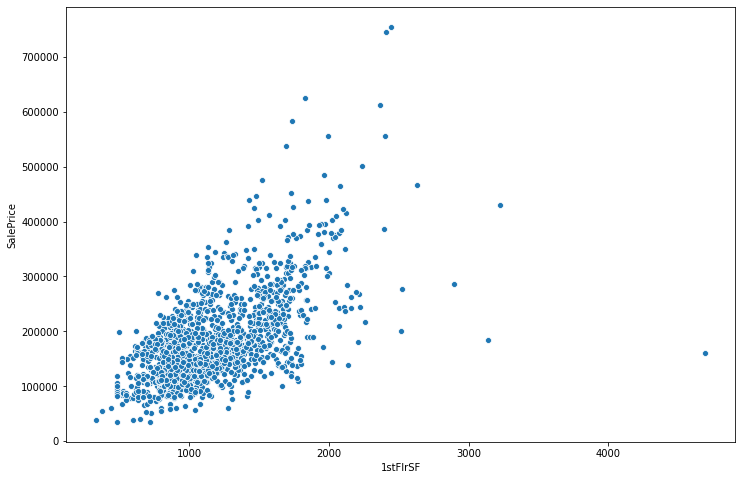

In [561]:
#plotting the first floor versus the salesprice 
plt.figure(figsize=(12,8))
sns.scatterplot(df['1stFlrSF'],df['SalePrice'])
plt.show()

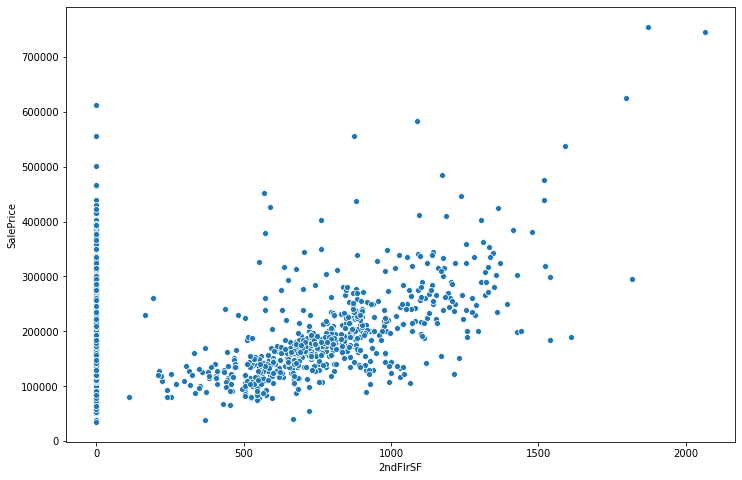

In [562]:
#plotting the 2nd floor versus the salesprice 
plt.figure(figsize=(12,8))
sns.scatterplot(df['2ndFlrSF'],df['SalePrice'])
plt.show()

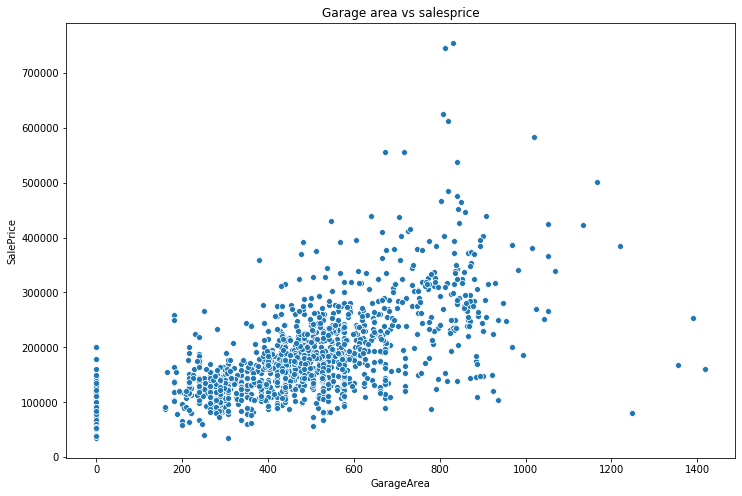

In [563]:
#plotting the garage floor versus the salesprice 
plt.figure(figsize=(12,8))
sns.scatterplot(df['GarageArea'],df['SalePrice'])
plt.title("Garage area vs salesprice")
plt.show()

- teh garage area between 200 to 1000 is in more demand 

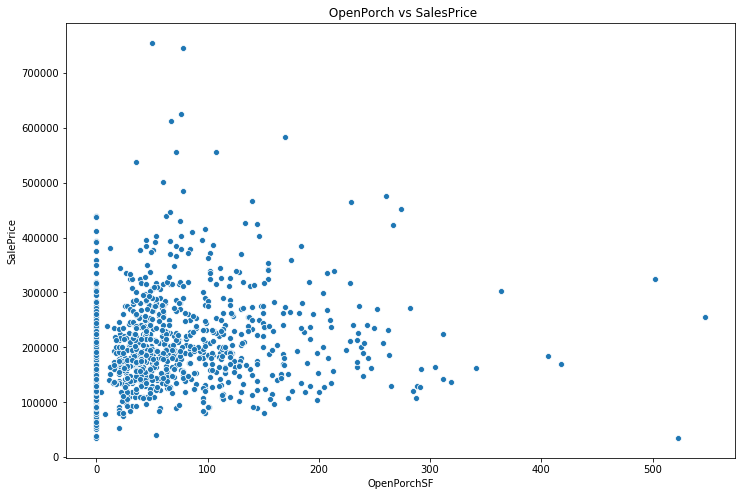

In [564]:
#plotting the open porch versus the salesprice 
plt.figure(figsize=(12,8))
sns.scatterplot(df['OpenPorchSF'],df['SalePrice'])
plt.title(" OpenPorch vs SalesPrice")
plt.show()

- the house with the open porch under 300 sqtft is in more demand 

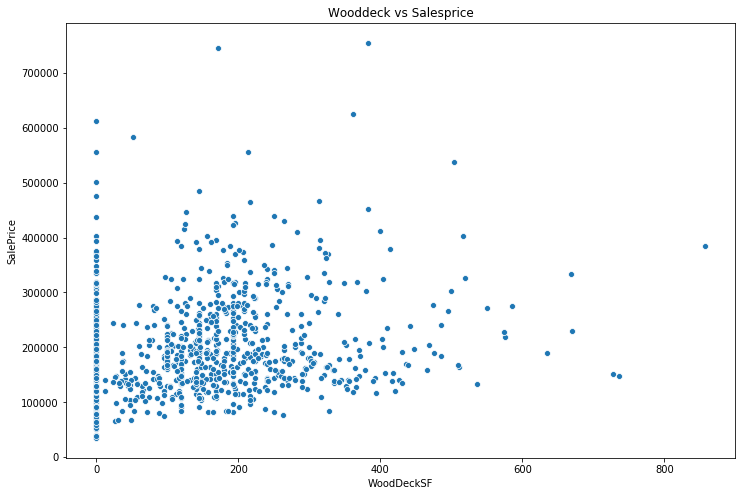

In [565]:
#plotting the WoodDeckSF versus the salesprice 
plt.figure(figsize=(12,8))
sns.scatterplot(df['WoodDeckSF'],df['SalePrice'])
plt.title("Wooddeck vs Salesprice")
plt.show()

- wooden deck area between 20 to 500per sqft has good demand and hence also contributes in the high salesprice

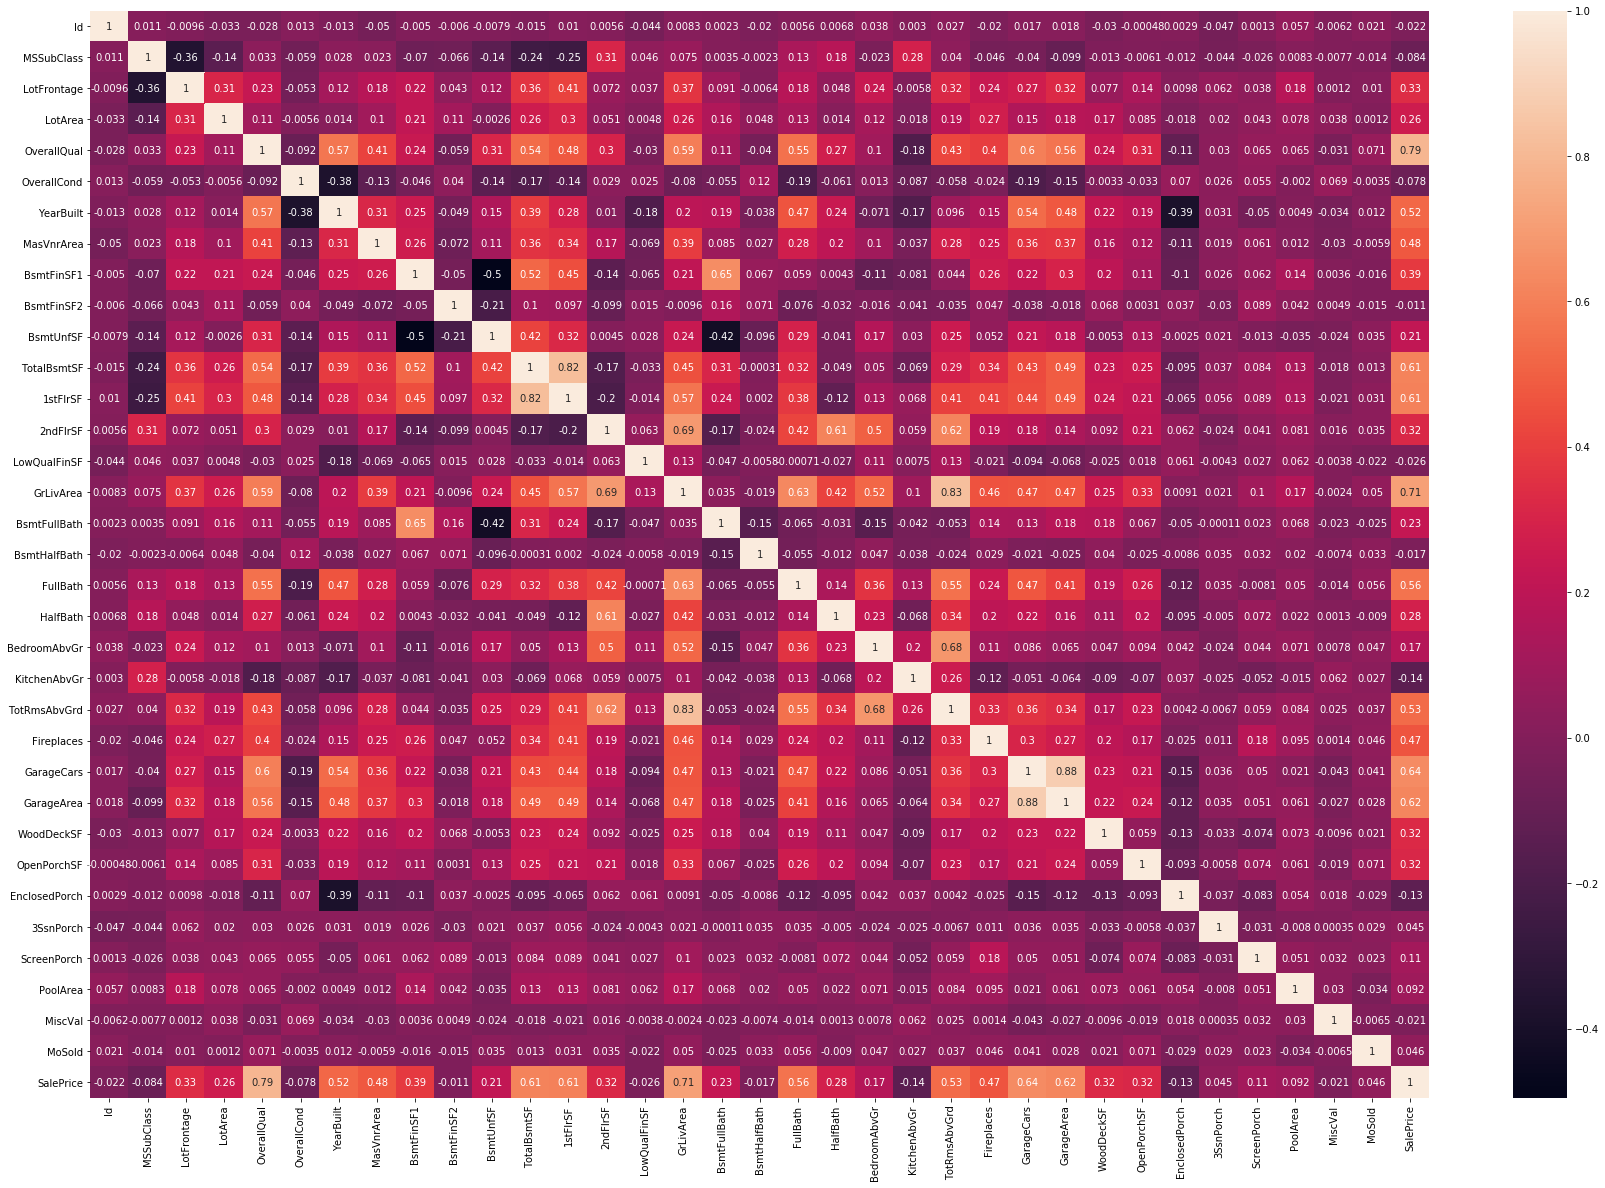

In [566]:
#plotting the heatmap of thedatset to check the correlation of the variable
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

- we notice that the sales price is higly related to the overall qulityof the house . the good quality the higher the price of the home 
- The house with the above ground living area also is highly relate corelated to the salesprice of the house the higher theabove the groung lining area the higher the sales price of the house
- The garage cars and the garage area also shows high corelation between them

### Data preparation

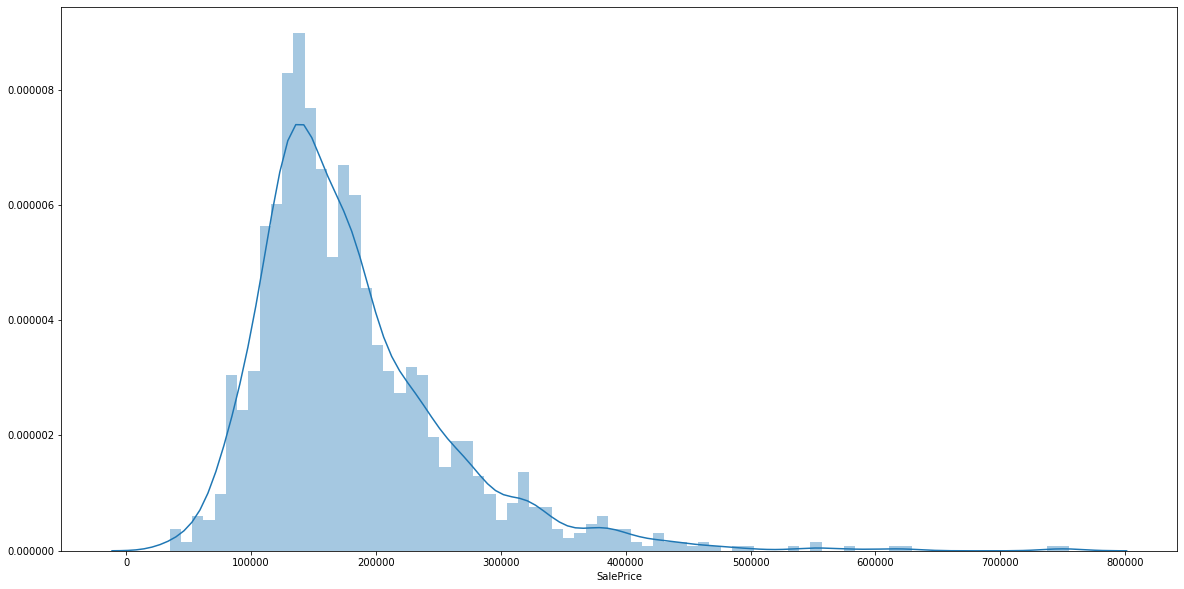

In [567]:
#checking the output variable (target variable)
plt.figure(figsize=(20,10))
sns.distplot(df["SalePrice"],bins=80)
plt.show()

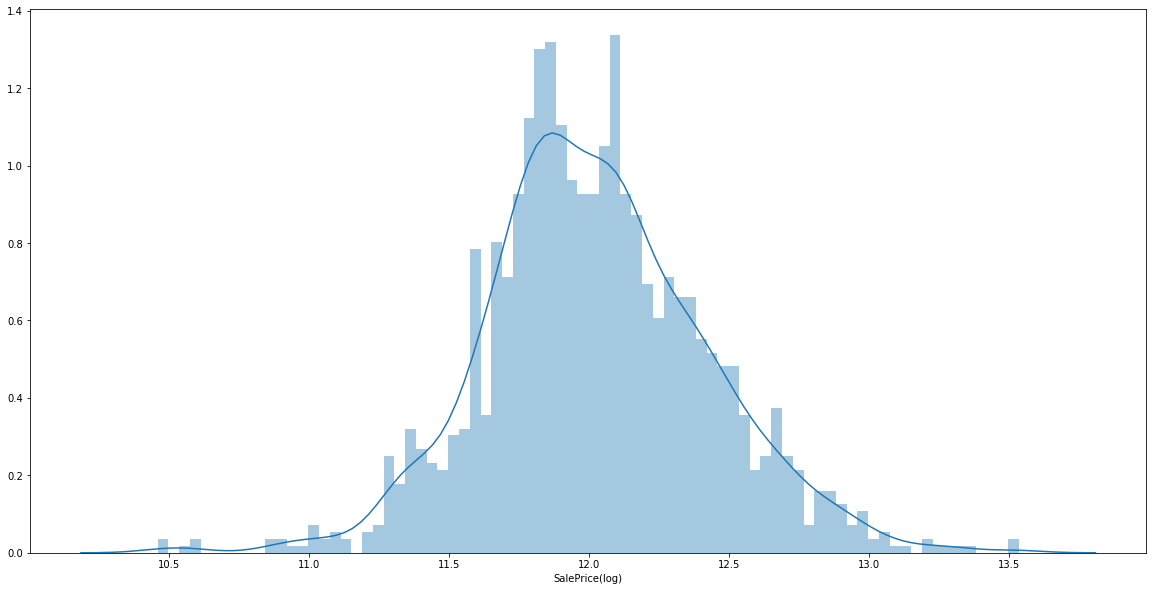

In [568]:
#tranforming the target variable  to treat the outliers 
df['SalePrice(log)'] = np.log(df['SalePrice'])
plt.figure(figsize=(20,10))
sns.distplot(df["SalePrice(log)"],bins=80)
plt.show()

In [569]:
#deriving new feature 
df['ageofthehouse'] = pd.datetime.now().year - df['YearBuilt']
df['ageofthehouse']

0        17
1        44
2        19
3       105
4        20
       ... 
1455     21
1456     42
1457     79
1458     70
1459     55
Name: ageofthehouse, Length: 1460, dtype: int64

In [570]:
#drop the yearbuilt as we derived the new feature age of the house 
df.drop("YearBuilt",axis=1,inplace=True)

In [571]:
#keeping the copy of the dataset
df_new=df.copy()
df_new.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolA

In [572]:
#drop the id and the sales feature 
df_new.drop(['Id','SalePrice'],axis=1,inplace=True)
df_new.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 

In [573]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_new_categorical =df_new.select_dtypes(include=['object'])
df_new_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Heating,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,GasA,Ex,Y,Gd,Typ,NofireplaceQu,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,GasA,Ex,Y,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,GasA,Ex,Y,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,GasA,Gd,Y,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,GasA,Ex,Y,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [574]:
df_new_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [575]:
# convert into dummies
df_new_dummies = pd.get_dummies(df_new_categorical, drop_first=True)
df_new_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Othersbasement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NofireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_OthersGarageType,GarageFinish_NoGarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarageQual,GarageQual_OthersGarageQual,GarageQual_TA,GarageCond_NoGarageCond,GarageCond_OthersGarageCond,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1

In [576]:
df_new_concat=pd.concat([df_new,df_new_dummies],axis=1)
df_new_concat.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice(log),ageofthehouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Othersbasement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NofireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_OthersGarageType,GarageFinish_NoGarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarageQual,GarageQual_OthersGarageQual,GarageQual_TA,GarageCond_NoGarageCond,GarageCond_OthersGarageCond,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCo

In [577]:
# Drop categorical variable as we have created the dummies for it
df_new_concat.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'], axis = 1, inplace = True)

df_new_concat.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice(log),ageofthehouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Othersbasement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NofireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_OthersGarageType,GarageFinish_NoGarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarageQual,GarageQual_OthersGarageQual,GarageQual_TA,GarageCond_NoGarageCond,GarageCond_OthersGarageCond,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,17,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,

In [578]:
#checking the columns of the dataset
df_new_concat.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=224)

## Step-4 Splitting the Data into Training and Testing Sets

In [579]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_new_concat, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

### scaling the features

In [580]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [581]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables, since it is a large dataset
#so even if you apply scaling on all varibales doent make difference 
vars = df_new_concat.columns
df_train[vars] = scaler.fit_transform(df_train[vars])

df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice(log),ageofthehouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Othersbasement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NofireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_OthersGarageType,GarageFinish_NoGarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarageQual,GarageQual_OthersGarageQual,GarageQual_TA,GarageCond_NoGarageCond,GarageCond_OthersGarageCond,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,0.444444,0.625,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.181818,0.000000,0.00,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.272727,0.335850,0.615942,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0

### Dividing into X and Y sets for the model building

In [582]:
# split into train and test
y_train = df_train.pop('SalePrice(log)')
X_train = df_train

### Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [583]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [584]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [585]:
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [586]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 66),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 171),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 6),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 138),
 ('FullBath', False, 156),
 ('HalfBath', False, 132),
 ('BedroomAbvGr', False, 79),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 114),
 ('Fireplaces', False, 116),
 ('GarageCars', False, 13),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 14),
 ('OpenPorchSF', False, 56),
 ('EnclosedPorch', False, 55),
 ('3SsnPorch', False, 54),
 ('ScreenPorch', False, 29),
 ('PoolArea', False, 70),
 ('MiscVal', False, 33),
 ('MoSold', False, 170),
 ('ageofthehouse', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM',

In [587]:
#the rfe supported columns or can say the rfe selected features
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'ageofthehouse',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LandSlope_Sev', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'KitchenQual_TA', 'Functional_Min1', 'Functional_Min2',
       'Functional_Sev', 'Functional_Typ', 'SaleType_Con', 'SaleType_ConLD'],
      dtype='object')

In [588]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [589]:
lm2 = LinearRegression()
lm2.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [590]:
# Print the coefficients and intercept
print(lm2.coef_)
print(lm2.intercept_)

[ 0.04335229  0.2144526   0.19969923  0.11361902  0.19706971  0.0231096
  0.0131412   0.19263876  0.22225915  0.090291    0.27559997 -0.07833081
  0.08347897 -0.14897142  0.13649049  0.12680405  0.12663245  0.1177268
  0.05118257 -0.04102785 -0.05070984  0.04464665 -0.04096647 -0.60914591
 -0.20000778 -0.04627405 -0.03911887 -0.03728743  0.12941851  1.05442975
  1.17658513  1.12114211  1.06089692  1.07827669  0.9714816   1.06881965
 -0.01404378 -0.1128858  -0.01776134 -0.01404378  0.04767346  0.04376291
  0.09877451 -0.00932257  0.04031826  0.05096511 -0.17708795  0.05202985
  0.0495601   0.05617418]
-1.1204424433448081


In [591]:
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,GarageArea,ageofthehouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_MeadowV,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior2nd_AsphShn,Heating_GasA,Heating_GasW,Heating_Wall,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Sev,Functional_Typ,SaleType_Con,SaleType_ConLD
210,0.157534,0.019306,0.444444,0.625,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.081860,0.0,0.000000,0.615942,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
318,0.236301,0.039403,0.666667,0.500,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.424289,0.0,0.462623,0.123188,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
239,0.106164,0.033981,0.555556,0.375,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.201576,0.0,0.155148,0.471014,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
986,0.130137,0.017931,0.555556,0.875,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.230015,0.0,0.179831,0.724638,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1416,0.133562,0.046139,0.333333,0.625,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,0.355880,0.5,0.394922,0.905797,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [592]:
X_train_rfe.shape

(1021, 50)

#### Applying the scaling on the test sets

In [593]:

num_vars = df_new_concat.columns
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice(log),ageofthehouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Othersbasement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NofireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_OthersGarageType,GarageFinish_NoGarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarageQual,GarageQual_OthersGarageQual,GarageQual_TA,GarageCond_NoGarageCond,GarageCond_OthersGarageCond,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.00000,0.109142,0.0,0.106164,0.141408,0.113889,0.000000,0.0,0.081860,0.000000,0.0,0.333333,0.0,0.375,0.0,0.181818,0.000000,0.50,0.372355,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.363636,0.403081,0.282609,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [594]:
df_test.shape

(438, 224)

### Dividing into X_test and y_test

In [595]:
y_test = df_test.pop('SalePrice(log)')
X_test = df_test

In [596]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

In [597]:
# # Making predictions
# y_pred = lm2.predict(X_test_new)

In [598]:
from sklearn.metrics import r2_score, mean_squared_error

In [599]:
# Making predictions
y_pred_train = lm2.predict(X_train_rfe)
y_pred_test = lm2.predict(X_test_new)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9290410652026068
0.8416854834607483
1.2050030873666913
1.207240168962577
0.0011802184988900012
0.002756256093521865


## Ridge Regression

In [600]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [601]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004998,0.001417,0.001742,0.000252,0.0001,{'alpha': 0.0001},-0.026455,-0.032260,-0.031276,-0.033343,-0.027903,-0.030247,0.002629,4,-0.025084,-0.025359,-0.025251,-0.025235,-0.024792,-0.025144,0.000197
1,0.003715,0.000236,0.001461,0.000007,0.001,{'alpha': 0.001},-0.026461,-0.032260,-0.031279,-0.033258,-0.027901,-0.030232,0.002608,3,-0.025100,-0.025360,-0.025264,-0.025249,-0.024805,-0.025156,0.000194
2,0.003724,0.000393,0.001358,0.000198,0.01,{'alpha': 0.01},-0.026545,-0.032254,-0.031351,-0.032516,-0.027954,-0.030124,0.002420,1,-0.025275,-0.025373,-0.025445,-0.025396,-0.024953,-0.025288,0.000177
3,0.004018,0.001963,0.001065,0.000192,0.05,{'alpha': 0.05},-0.027081,-0.032229,-0.031845,-0.030798,-0.028863,-0.030163,0.001933,2,-0.026127,-0.025440,-0.026207,-0.026118,-0.025816,-0.025942,0.000284
4,0.003819,0.000746,0.001563,0.000481,0.1,{'alpha': 0.1},-0.027819,-0.032199,-0.032343,-0.030074,-0.029936,-0.030474,0.001672,5,-0.026943,-0.025522,-0.026956,-0.026869,-0.026642,-0.026586,0.000544


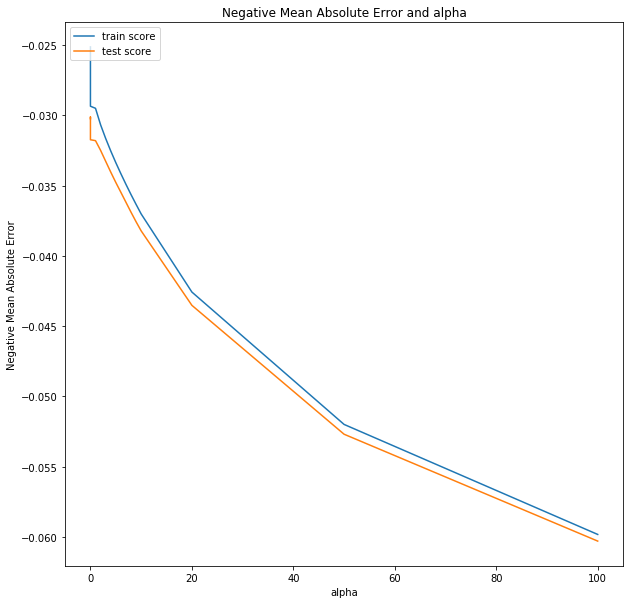

In [602]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [603]:
print(model_cv.best_params_)

{'alpha': 0.01}


In [604]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge_param=ridge.coef_
ridge_param

array([ 0.0343032 ,  0.20610353,  0.20450759,  0.11318402,  0.18557461,
        0.02320715,  0.01163618,  0.1814685 ,  0.2204639 ,  0.08728186,
        0.27546808, -0.07664763,  0.08472682, -0.14919733,  0.13468578,
        0.12556181,  0.12620634,  0.11604445,  0.05135715, -0.03305098,
       -0.05229624,  0.04502951, -0.04164229, -0.59272268, -0.19034722,
       -0.04537023, -0.04259073, -0.04051118,  0.12028962,  0.95798155,
        1.05767781,  1.00346959,  0.95579828,  0.97575161,  0.87116201,
        0.97313427, -0.01568661, -0.11310996, -0.01642378, -0.01568661,
        0.04806823,  0.04498589,  0.09559281, -0.00942984,  0.04002532,
        0.0503529 , -0.17312525,  0.05134448,  0.0495504 ,  0.05539554])

In [605]:
from sklearn.metrics import r2_score, mean_squared_error

In [606]:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9286068386658823
0.8435663405878191
1.2123769905807613
1.1928975405952258
0.0011874407351427632
0.0027235103666557667


## Lasso

In [607]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [608]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015723,0.005856,0.001564,0.000372,0.0001,{'alpha': 0.0001},-0.029896,-0.032976,-0.034512,-0.029506,-0.032830,-0.031944,0.001928,1,-0.029836,-0.026441,-0.029992,-0.029145,-0.030142,-0.029111,0.001378
1,0.004883,0.001474,0.001267,0.000248,0.001,{'alpha': 0.001},-0.036483,-0.040272,-0.039868,-0.036470,-0.039308,-0.038480,0.001665,2,-0.039356,-0.034691,-0.037230,-0.038882,-0.038768,-0.037785,0.001704
2,0.003898,0.000918,0.001367,0.000367,0.01,{'alpha': 0.01},-0.074996,-0.074425,-0.072328,-0.070988,-0.074282,-0.073404,0.001506,3,-0.072466,-0.072350,-0.073068,-0.073828,-0.073924,-0.073127,0.000659
3,0.002531,0.000197,0.001172,0.000233,0.05,{'alpha': 0.05},-0.101910,-0.101972,-0.099497,-0.096597,-0.105268,-0.101049,0.002885,4,-0.100816,-0.100456,-0.101213,-0.101808,-0.099984,-0.100856,0.000625
4,0.003228,0.000500,0.001463,0.000309,0.1,{'alpha': 0.1},-0.101910,-0.101972,-0.099497,-0.096597,-0.105268,-0.101049,0.002885,4,-0.100816,-0.100456,-0.101213,-0.101808,-0.099984,-0.100856,0.000625


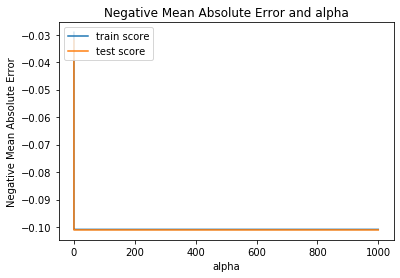

In [609]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [610]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [611]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [612]:
model_parameters=lasso.coef_
model_parameters

array([-0.00621298,  0.08610457,  0.26021128,  0.11120284,  0.0853181 ,
        0.01837786, -0.        ,  0.05942865,  0.07462572,  0.        ,
        0.40486522, -0.04842882,  0.09904036, -0.14850654,  0.06429566,
        0.05392555,  0.07014621,  0.04515147,  0.03443949,  0.04180674,
       -0.05190352,  0.04588377, -0.02836008, -0.38878496, -0.        ,
       -0.        , -0.04747217, -0.04351744,  0.        ,  0.09206875,
        0.01356664,  0.        ,  0.        ,  0.05124904,  0.        ,
        0.12065261, -0.        , -0.0577098 , -0.        , -0.        ,
        0.00994144,  0.01029348,  0.        , -0.01108128,  0.02281835,
        0.03176453, -0.02599548,  0.032401  ,  0.00393987,  0.01317843])

In [613]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8795050837730838
0.856762198903386
2.0462080847183004
1.0922714541772973
0.002004121532535064
0.002493770443327163


In [614]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.929041,0.928607,0.879505
1,R2 Score (Test),0.841685,0.843566,0.856762
2,RSS (Train),1.205003,1.212377,2.046208
3,RSS (Test),1.207240,1.192898,1.092271
4,RMSE (Train),0.034354,0.034459,0.044767
5,RMSE (Test),0.052500,0.052187,0.049938


## Lets observe the changes in the coefficients after regularization

In [615]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [616]:
betas.rows = X_train_rfe.columns

In [617]:
betas['Linear'] = lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [618]:
pd.set_option('display.max_rows', None)
betas.head(15)

,Linear,Ridge,Lasso
LotFrontage,0.043352,0.034303,-0.006213
LotArea,0.214453,0.206104,0.086105
OverallQual,0.199699,0.204508,0.260211
OverallCond,0.113619,0.113184,0.111203
BsmtFinSF1,0.197070,0.185575,0.085318
BsmtFinSF2,0.023110,0.023207,0.018378
BsmtUnfSF,0.013141,0.011636,-0.000000
TotalBsmtSF,0.192639,0.181469,0.059429
1stFlrSF,0.222259,0.220464,0.074626
2ndFlrSF,0.090291,0.087282,0.000000


- Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.
- Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.
- Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.

- the lower the value of the mean square error the better is the model

# Conclusion

### Ridge Coefficient

In [620]:
for i,j in sorted(list(zip(ridge_param,X_train_rfe)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{j:30}Score: {i}')

RoofMatl_Metal                Score: 1.0034695895255759
RoofMatl_Tar&Grv              Score: 0.9757516128069734
RoofMatl_WdShngl              Score: 0.9731342748236612
RoofMatl_CompShg              Score: 0.9579815530287603
RoofMatl_Roll                 Score: 0.9557982761559901
RoofMatl_WdShake              Score: 0.8711620094193612
Condition2_PosN               Score: -0.5927226776220471
GrLivArea                     Score: 0.2754680821445194
1stFlrSF                      Score: 0.22046389995992854
LotArea                       Score: 0.20610352588362427
OverallQual                   Score: 0.2045075904979451
Condition2_RRAe               Score: -0.19034721601631713
BsmtFinSF1                    Score: 0.1855746080672974
TotalBsmtSF                   Score: 0.1814685016505109
Functional_Sev                Score: -0.1731252487656763
ageofthehouse                 Score: -0.1491973286734132
MSZoning_FV                   Score: 0.13468578344315174
MSZoning_RL                   Score: 0.1

### Lasso Coefficients

In [619]:
for i,j in sorted(list(zip(model_parameters,X_train_rfe)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{j:40}Score: {i}')

Condition2_PosN                         Score: -0.3887849550699396
OverallQual                             Score: 0.26021127531178073
ageofthehouse                           Score: -0.14850653608614
RoofMatl_WdShngl                        Score: 0.12065261178751663
OverallCond                             Score: 0.11120283589081892
GarageArea                              Score: 0.09904035996588367
RoofMatl_CompShg                        Score: 0.09206875496864142
LotArea                                 Score: 0.08610457437956505
BsmtFinSF1                              Score: 0.0853180968033725
1stFlrSF                                Score: 0.07462572235177492
MSZoning_RL                             Score: 0.070146210850407
MSZoning_FV                             Score: 0.06429566312002162
TotalBsmtSF                             Score: 0.05942864689712423
Exterior1st_BrkComm                     Score: -0.05770979744706506
MSZoning_RH                             Score: 0.05392554940201204

#### Went ahead with the Lasso regression model as  this term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely.

Lasso regression model:Some of the best features for the predicting the house price are 
- **OverallQual:** Rates the overall material and finish of the house, so this feature led the rise in the sales price 
- **RoofMatl_WdShngl:** The roof material which had the wooden shingles alsoin demand and thus led to the rise in the sales price
- **OverallCond:** If the overall conditiion of the house is good then the sales price also is high
- **GarageArea:** Size of garage in square feet, The size of the garage also is the reason for the rise in the sales price of the house, the higher the garage area in square feet the higher the sales price of the house 
- **RoofMatl_CompShg:** standard shinles roof material also in demand and thus the sales price is higher for the house  
- **LotArea:** bigger the Lot size in square feet higher the sales price of the house 
- **BsmtFinSF1:** higher demand in the finished area of basement hence higher the sales price 
- **1stFlrSF:** Bigger the area of the first floor the higher the sales price of the house 
- **MSZoning_RL:** preference of the house with Residential Low Density also plays the big role in increase in the sales price of the house 
- **MSZoning_FV:** Floating Village Residential demand in the higher sale price of the house 


### Subjective question:3

The top predictors by the model are these lest drop these and build the mdoel again.
- OverallQual
- RoofMatl_WdShngl
- OverallCond
- GarageArea 
- RoofMatl_CompShg

In [621]:
X_train_rfe1=X_train_rfe.drop(["OverallQual","RoofMatl_WdShngl","OverallCond","GarageArea","RoofMatl_CompShg"],axis=1)

In [622]:
lm3 = LinearRegression()
lm3.fit(X_train_rfe1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [623]:
# Print the coefficients and intercept
print(lm3.coef_)
print(lm3.intercept_)

[-0.09347617  0.22404504  0.10154583  0.02187146  0.01325299  0.10414438
  0.41547616  0.14607701  0.26078831 -0.13656999 -0.191245    0.17930293
  0.15526258  0.17289125  0.16667791  0.044602   -0.06572166 -0.07468311
  0.06112665 -0.09719211 -0.56376768 -0.26419617 -0.03528603 -0.03345693
 -0.02193799  0.18662118  0.24799449  0.12351716  0.01638953  0.02321225
 -0.07832241 -0.04494539 -0.17407889 -0.02690388 -0.04494539  0.0715056
  0.07749888  0.06826002 -0.0323106   0.07052421  0.06802981 -0.15308856
  0.09162433  0.05276593  0.03359193]
0.059425989709066096


In [624]:
X_train_rfe1.shape

(1021, 45)

In [625]:
X_test_new1 = X_test[X_train_rfe1.columns]
X_test_new1.shape

(438, 45)

In [626]:
from sklearn.metrics import r2_score, mean_squared_error

In [629]:
#Making predictions
y_pred_train = lm3.predict(X_train_rfe1)
y_pred_test = lm3.predict(X_test_new1)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.833386384540826
0.7659694183460002
2.829381833293906
1.7846191563130318
0.0027711869082212596
0.004074472959618794


### Ridge Regression-rebuilding

In [630]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [631]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003913,0.000614,0.001358,0.000478,0.0001,{'alpha': 0.0001},-0.038111,-0.040369,-0.040599,-0.037170,-0.038727,-0.038995,0.001315,10,-0.035252,-0.031722,-0.035978,-0.036025,-0.035065,-0.034808,0.001590
1,0.003814,0.000194,0.001171,0.000248,0.001,{'alpha': 0.001},-0.038109,-0.040366,-0.040594,-0.037169,-0.038729,-0.038993,0.001313,9,-0.035255,-0.031725,-0.035979,-0.036027,-0.035068,-0.034811,0.001589
2,0.003714,0.000391,0.001366,0.000478,0.01,{'alpha': 0.01},-0.038112,-0.040330,-0.040545,-0.037153,-0.038755,-0.038979,0.001297,7,-0.035281,-0.031750,-0.035982,-0.036046,-0.035101,-0.034832,0.001586
3,0.003912,0.000012,0.001361,0.000473,0.05,{'alpha': 0.05},-0.038127,-0.040205,-0.040338,-0.037087,-0.038858,-0.038923,0.001237,5,-0.035399,-0.031855,-0.035999,-0.036127,-0.035249,-0.034926,0.001572
4,0.003718,0.000236,0.001161,0.000245,0.1,{'alpha': 0.1},-0.038138,-0.040088,-0.040148,-0.037016,-0.038970,-0.038872,0.001191,3,-0.035540,-0.031981,-0.036045,-0.036223,-0.035415,-0.035041,0.001559


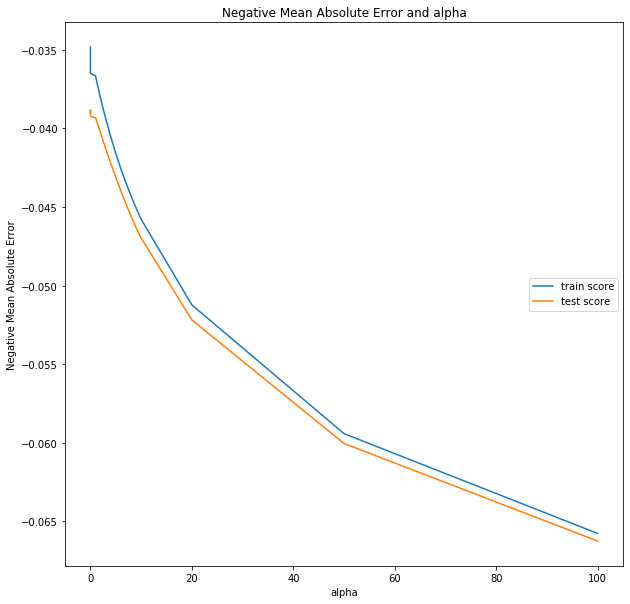

In [632]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='right')
plt.show()

In [633]:
print(model_cv.best_params_)

{'alpha': 0.2}


In [649]:
alpha = 0.02
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe1, y_train)
ridge.coef_


array([-0.09168672,  0.21763268,  0.10275331,  0.02218109,  0.01364753,
        0.10548531,  0.39242911,  0.13639779,  0.28361271, -0.13589504,
       -0.1915231 ,  0.17736542,  0.15320493,  0.17121276,  0.16489661,
        0.04492314, -0.0609019 , -0.07459699,  0.06133232, -0.09702691,
       -0.55094115, -0.24226336, -0.03459813, -0.03365109, -0.02211608,
        0.1697245 ,  0.23917466,  0.11641029,  0.01583503,  0.02133726,
       -0.07429976, -0.04422379, -0.17146162, -0.02656022, -0.04422379,
        0.07104877,  0.07709542,  0.06766004, -0.03242721,  0.07066051,
        0.06822459, -0.1475727 ,  0.09165443,  0.05243211,  0.03278519])

In [650]:
y_pred_train = ridge.predict(X_train_rfe1)
y_pred_test = ridge.predict(X_test_new1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8333548910952665
0.7681740895985665
2.829916645424886
1.7678072571035544
0.0027717107202986147
0.004036089628090307


### Lasso-rebuild

In [651]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [652]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022561,0.002805,0.001758,0.000390,0.0001,{'alpha': 0.0001},-0.037945,-0.040547,-0.040075,-0.037244,-0.039611,-0.039084,0.001271,1,-0.036904,-0.033081,-0.037247,-0.037146,-0.036837,-0.036243,0.001588
1,0.004587,0.000497,0.001276,0.000237,0.001,{'alpha': 0.001},-0.042132,-0.045221,-0.044597,-0.044371,-0.047265,-0.044717,0.001647,2,-0.044904,-0.040779,-0.043522,-0.045482,-0.044784,-0.043894,0.001684
2,0.005766,0.003122,0.001462,0.000311,0.01,{'alpha': 0.01},-0.080579,-0.078714,-0.076851,-0.076099,-0.079303,-0.078309,0.001632,3,-0.078036,-0.077465,-0.078210,-0.078136,-0.078271,-0.078023,0.000290
3,0.003518,0.000355,0.001559,0.000197,0.05,{'alpha': 0.05},-0.101910,-0.101972,-0.099497,-0.096597,-0.105268,-0.101049,0.002885,4,-0.100816,-0.100456,-0.101213,-0.101808,-0.099984,-0.100856,0.000625
4,0.002927,0.000754,0.001072,0.000196,0.1,{'alpha': 0.1},-0.101910,-0.101972,-0.099497,-0.096597,-0.105268,-0.101049,0.002885,4,-0.100816,-0.100456,-0.101213,-0.101808,-0.099984,-0.100856,0.000625


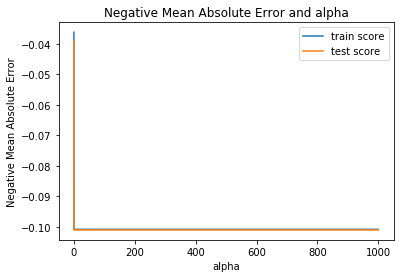

In [653]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc=' right')
plt.show()

In [654]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [655]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe1, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [656]:
lasso.coef_

array([-0.04455113,  0.11690565,  0.06911916,  0.00815211, -0.        ,
        0.13704002,  0.20176881,  0.0491258 ,  0.48240739, -0.12476507,
       -0.19442547,  0.11875987,  0.08779383,  0.11510838,  0.10577115,
        0.03179957,  0.        , -0.06090371,  0.06075519, -0.0812157 ,
       -0.43758982, -0.        , -0.        , -0.01771337, -0.00656188,
        0.        ,  0.10285224,  0.        ,  0.        , -0.        ,
       -0.00393444, -0.        , -0.10813697, -0.        , -0.        ,
        0.02870057,  0.03028076,  0.        , -0.03381333,  0.05614346,
        0.05378311, -0.01185697,  0.07879066,  0.006092  ,  0.        ])

In [657]:
y_pred_train = lasso.predict(X_train_rfe1)
y_pred_test = lasso.predict(X_test_new1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8231094100473806
0.7850905230423457
3.003902294018826
1.6388096236878662
0.0029421178198029635
0.0037415744833056304


In [658]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.833386,0.833355,0.823109
1,R2 Score (Test),0.765969,0.768174,0.785091
2,RSS (Train),2.829382,2.829917,3.003902
3,RSS (Test),1.784619,1.767807,1.638810
4,RMSE (Train),0.052642,0.052647,0.054241
5,RMSE (Test),0.063832,0.063530,0.061168


## Lets observe the changes in the coefficients after regularization



In [659]:
betas = pd.DataFrame(index=X_train_rfe1.columns)

In [660]:
betas.rows = X_train_rfe1.columns

In [661]:
betas['Linear'] = lm3.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [662]:
pd.set_option('display.max_rows', None)
betas.head(15)

,Linear,Ridge,Lasso
LotFrontage,-0.093476,-0.091687,-0.044551
LotArea,0.224045,0.217633,0.116906
BsmtFinSF1,0.101546,0.102753,0.069119
BsmtFinSF2,0.021871,0.022181,0.008152
BsmtUnfSF,0.013253,0.013648,-0.000000
TotalBsmtSF,0.104144,0.105485,0.137040
1stFlrSF,0.415476,0.392429,0.201769
2ndFlrSF,0.146077,0.136398,0.049126
GrLivArea,0.260788,0.283613,0.482407
KitchenAbvGr,-0.136570,-0.135895,-0.124765


### Lasso coefficient 

In [663]:
for i,j in sorted(list(zip(lasso.coef_,X_train_rfe1)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{j:40}Score: {i}')

Condition2_PosN                         Score: -0.4375898155625622
1stFlrSF                                Score: 0.20176880783973605
ageofthehouse                           Score: -0.19442546693304757
TotalBsmtSF                             Score: 0.13704002116057618
KitchenAbvGr                            Score: -0.12476506773532903
MSZoning_FV                             Score: 0.1187598690016313
LotArea                                 Score: 0.11690565411709988
MSZoning_RL                             Score: 0.11510838034791228
Exterior1st_BrkComm                     Score: -0.10813696632828375
MSZoning_RM                             Score: 0.1057711460539563
RoofMatl_Membran                        Score: 0.10285223778133908
MSZoning_RH                             Score: 0.08779383137365446
Neighborhood_MeadowV                    Score: -0.08121569660132384
Functional_Typ                          Score: 0.07879065921344865
BsmtFinSF1                              Score: 0.06911915565

Preference according to the new Lasso model are:
- 1stFlrSF 
- TotalBsmtSF
- MSZoning_FV
- LotArea
- MSZoning_RL